![picture](./Slide1.jpeg)

![picture](./Slide2.jpeg)

![picture](./Slide3.jpeg)

![picture](./Slide4.jpeg)

![picture](./Slide5.jpeg)

![picture](./Slide6.jpeg)

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as datetime

In [31]:
#load dataset from Kaggle
df = pd.read_csv('ks-projects-201801.csv')

In [32]:
display(df.shape)
display(df.head())

(378661, 15)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [33]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [34]:
#Reclassifies deadline and launch as datetime, adds duration column to denote span of kickstarter campaign
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['duration'] = df['deadline'] - df['launched']
df['duration'] = df['duration'].apply(lambda x: x.days)
df.drop(['currency', 'goal','pledged','usd pledged'], axis=1, inplace=True)

In [35]:
df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,55


In [36]:
#counts null entries in any columns and sorts in descending order 
display(df.isnull().sum().sort_values(ascending=False))

#Replaces any NaNs under name with 'Anonymous'
df['name'].replace(np.nan, 'Anonymous', regex=True, inplace=True)

name                4
duration            0
usd_goal_real       0
usd_pledged_real    0
country             0
backers             0
state               0
launched            0
deadline            0
main_category       0
category            0
ID                  0
dtype: int64

In [37]:
df['progress'] = df['usd_pledged_real'] / df['usd_goal_real']
df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration,progress
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,55,0.065795


In [38]:
#remove outliers
print("Before removing outliers:")
display(df.describe())
df_1 = df[np.abs(df.progress-df.progress.mean())<=(3*df.progress.std())]
df_2 = df_1[np.abs(df_1.duration-df_1.duration.mean())<=(3*df_1.duration.std())]
df_3 = df_2[np.abs(df_2.backers-df_2.backers.mean())<=(3*df_2.backers.std())]
df_4 = df_3[np.abs(df_3.usd_pledged_real-df_3.usd_pledged_real.mean())<=(3*df_3.usd_pledged_real.std())]
df = df_4[np.abs(df_4.usd_goal_real-df_4.usd_goal_real.mean())<=(3*df_4.usd_goal_real.std())]

Before removing outliers:


,ID,backers,usd_pledged_real,usd_goal_real,duration,progress
count,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05,378661.000000,378661.000000
mean,1.074731e+09,105.617476,9.058924e+03,4.545440e+04,33.481122,3.236121
std,6.190862e+08,907.185035,9.097334e+04,1.152950e+06,65.909172,266.905405
min,5.971000e+03,0.000000,0.000000e+00,1.000000e-02,0.000000,0.000000
25%,5.382635e+08,2.000000,3.100000e+01,2.000000e+03,29.000000,0.004533
50%,1.075276e+09,12.000000,6.243300e+02,5.500000e+03,29.000000,0.134640
75%,1.610149e+09,56.000000,4.050000e+03,1.550000e+04,36.000000,1.065400
max,2.147476e+09,219382.000000,2.033899e+07,1.663614e+08,16738.000000,104277.890000


In [39]:
print("After removing outliers:")
display(df.describe())

After removing outliers:


,ID,backers,usd_pledged_real,usd_goal_real,duration,progress
count,3.723850e+05,372385.000000,372385.000000,3.723850e+05,372385.000000,372385.000000
mean,1.074720e+09,59.703533,4325.276286,2.298538e+04,33.174736,0.900755
std,6.191558e+08,152.068572,9856.151576,1.017739e+05,12.823391,8.090231
min,5.971000e+03,0.000000,0.000000,1.000000e-02,0.000000,0.000000
25%,5.381568e+08,2.000000,30.000000,2.000000e+03,29.000000,0.004167
50%,1.075330e+09,11.000000,585.000000,5.000000e+03,29.000000,0.125000
75%,1.610090e+09,52.000000,3717.070000,1.500000e+04,36.000000,1.055692
max,2.147472e+09,2605.000000,86474.500000,3.514511e+06,91.000000,796.000000


In [40]:
df.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [41]:
#Drops any row with undefined or live state
df = df[(df.state.str.contains("undefined") == False)]
df = df[(df.state.str.contains("live") == False)]

#recodes state to 1 for success and 0 for fail, canceled, or suspended
df['state'] = df['state'].map({'failed': 0, 'successful': 1, 'canceled':0, 'suspended':0})

In [42]:
#checks for balance between faileled/canceled/suspended and success 
df.state.value_counts()

0    237673
1    128392
Name: state, dtype: int64

In [43]:
#splits failed + success cases into separate dataframes and then randomly resamples from each dataframe
failed = df[df['state'] == 0]
success = df[df['state'] == 1]
success_samp = success.sample(n=100000,random_state=42)
failed_samp = failed.sample(n=100000,random_state=42)
df =  success_samp.merge(failed_samp,how='outer')

In [44]:
df.state.value_counts()

1    100000
0    100000
Name: state, dtype: int64

In [45]:
#converts categorical variables into dummies via one hot encoding
df = pd.concat((df[['main_category','category','country']],
                pd.get_dummies(df, columns=['main_category','category','country'], drop_first=True)),axis=1)

In [46]:
df.columns

Index(['main_category', 'category', 'country', 'ID', 'name', 'deadline',
       'launched', 'state', 'backers', 'usd_pledged_real',
       ...
       'country_JP', 'country_LU', 'country_MX', 'country_N,0"', 'country_NL',
       'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US'],
      dtype='object', length=207)

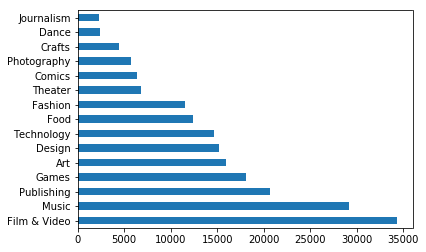

In [47]:
#Exploration: Main Category
df['main_category'].value_counts(ascending=False)[:20].plot(kind='barh')

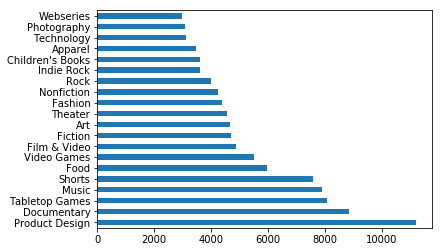

In [48]:
#Exploration: Category
df['category'].value_counts(ascending=False)[:20].plot(kind='barh')

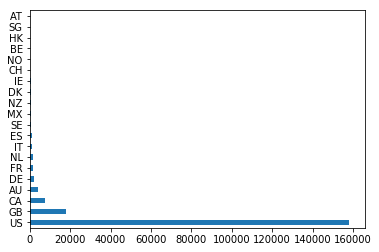

In [49]:
#Exploration: Country
df['country'].value_counts(ascending=False)[:20].plot(kind='barh')

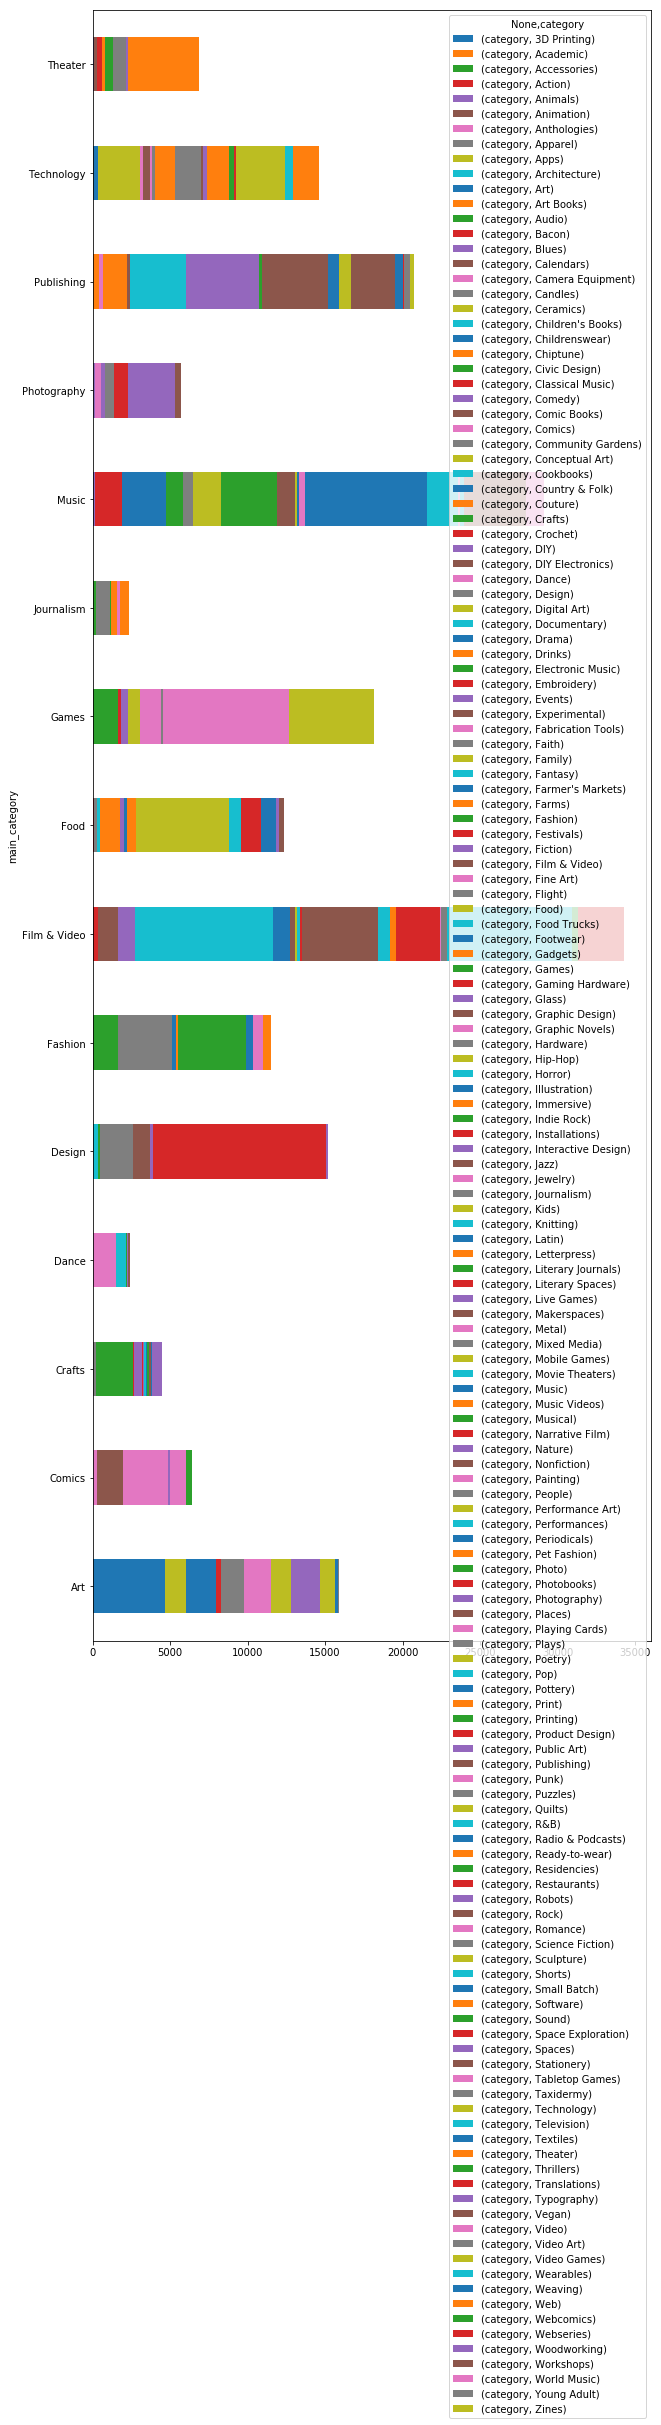

In [50]:
df2 = df.pivot_table(
    values = ['category'],
    columns = df['category'], index = df['main_category'], aggfunc={'category':np.count_nonzero}, fill_value=0)
display(df2.plot(kind='barh', stacked=True,figsize=(10,30)))   

In [57]:
#define outcome and features
outcome = df.state
features = df.drop(labels=['ID','country','main_category','category','name','deadline','launched'],axis=1)

#outcome = outcome.values
features = features.values

#need to reshape labels 
outcome = outcome.values.reshape(-1,1)

In [58]:
from sklearn.model_selection import train_test_split
featuresTrain,featuresTest,outcomeTrain,outcomeTest = train_test_split(features,outcome,test_size = 0.3,random_state = 42)

In [59]:
display(featuresTrain.shape)
display(featuresTest.shape)
display(outcomeTrain.shape)
display(outcomeTest.shape)

(140000, 200)

(60000, 200)

(140000, 1)

(60000, 1)

In [67]:
from sklearn.linear_model import perceptron
percept = perceptron.Perceptron(penalty='l1',max_iter=1000, verbose=0, random_state=42,fit_intercept=True)
percept.fit(featuresTrain,outcomeTrain.ravel())

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty='l1', random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Prediction
preds = pd.DataFrame(percept.predict(featuresTest))
display(accuracy_score(outcomeTest, preds))

# Confusion Matrix
conf_m = pd.DataFrame(confusion_matrix(outcomeTest,preds),index=['Actual_Fail','Actual_Success'], columns=['Predicted_Fail','Predicted_Success'])
display(conf_m)

#Classification Report
print(classification_report(outcomeTest, preds,target_names= ['Fail','Success']))

0.9965666666666667

,Predicted_Fail,Predicted_Success
Actual_Fail,29943,206
Actual_Success,0,29851


             precision    recall  f1-score   support

       Fail       1.00      0.99      1.00     30149
    Success       0.99      1.00      1.00     29851

avg / total       1.00      1.00      1.00     60000



In [72]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='l1',random_state=42)
logisticRegr.fit(featuresTrain, outcomeTrain.ravel())
preds = pd.DataFrame(logisticRegr.predict(featuresTest))
print('Accuracy Score:',accuracy_score(outcomeTest, preds))
conf_m = pd.DataFrame(confusion_matrix(outcomeTest,preds),index=['Actual_Fail','Actual_Success'], columns=['Predicted_Fail','Predicted_Success'])
display(conf_m)
print(classification_report(outcomeTest, preds,target_names= ['Fail','Success']))

Accuracy Score: 1.0


,Predicted_Fail,Predicted_Success
Actual_Fail,30149,0
Actual_Success,0,29851


             precision    recall  f1-score   support

       Fail       1.00      1.00      1.00     30149
    Success       1.00      1.00      1.00     29851

avg / total       1.00      1.00      1.00     60000



In [64]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(featuresTrain,outcomeTrain.ravel())
preds = pd.DataFrame(clf.predict(featuresTest))
print("Accuracy Score:",accuracy_score(outcomeTest, preds))

# Confusion Matrix
conf_m = pd.DataFrame(confusion_matrix(outcomeTest,preds),index=['Actual_Fail','Actual_Success'], columns=['Predicted_Fail','Predicted_Success'])
display(conf_m)

#Classification Report
print(classification_report(outcomeTest, preds,target_names= ['Fail','Success']))

Accuracy Score: 1.0


,Predicted_Fail,Predicted_Success
Actual_Fail,30149,0
Actual_Success,0,29851


             precision    recall  f1-score   support

       Fail       1.00      1.00      1.00     30149
    Success       1.00      1.00      1.00     29851

avg / total       1.00      1.00      1.00     60000



In [28]:
pd.DataFrame(df.columns)[:13]

,0
0,main_category
1,category
2,country
3,ID
4,name
5,deadline
6,launched
7,state
8,backers
9,usd_pledged_real


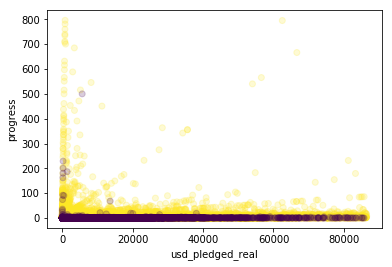

In [32]:
labels = clf.predict(features)
x = df.iloc[:,9]
y = df.iloc[:,12]
plt.xlabel(df.columns[9])
plt.ylabel(df.columns[12])
plt.scatter(x,y,c=labels,alpha=0.2)
plt.show()

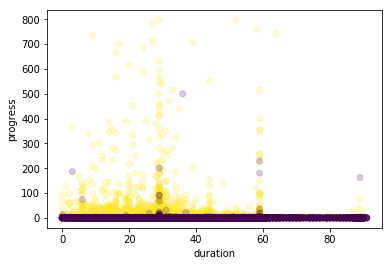

In [34]:
x = df.iloc[:,11]
y = df.iloc[:,12]
plt.xlabel(df.columns[11])
plt.ylabel(df.columns[12])
plt.scatter(x,y,c=labels,alpha=0.2)
plt.show()

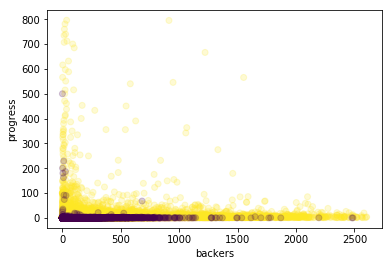

In [75]:
x = df.iloc[:,8]
y = df.iloc[:,12]
plt.xlabel(df.columns[8])
plt.ylabel(df.columns[12])
plt.scatter(x,y,c=labels,alpha=0.2,label=labels)
plt.show()

In [36]:
df[df.state==1]['progress'].describe()

count    100000.000000
mean          2.368692
std          13.427313
min           0.853222
25%           1.043447
50%           1.152912
75%           1.540700
max         796.000000
Name: progress, dtype: float64

In [37]:
df[df.state==0]['progress'].describe()

count    100000.000000
mean          0.116410
std           2.172523
min           0.000000
25%           0.000175
50%           0.016000
75%           0.110667
max         499.958407
Name: progress, dtype: float64

# Next steps:
* Possibility of feature engineering social media factors. For example, the number of Facebook shares, Twitter hashtags, etc could be linked to likelihood of backers coming across Kickstarter projects and consequently funding them.
* Feature engineering pledge tiers.

![picture](./Slide7.jpeg)